In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/student_data.csv')

# Prepare data
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']


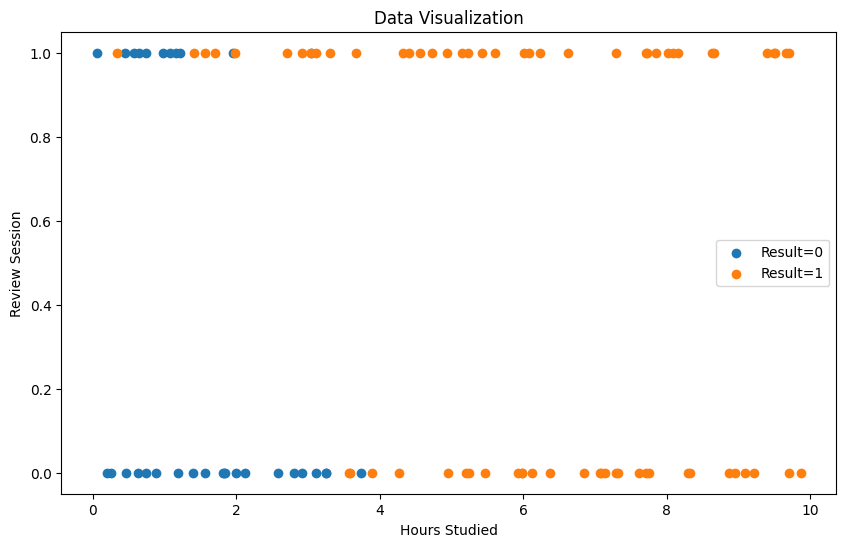

In [8]:
# Scatter plot of Hours_Studied vs. Review_Session colored by Results
plt.figure(figsize=(10,6))
for result in [0, 1]:
    plt.scatter(X.loc[y == result, 'Hours_Studied'], X.loc[y == result, 'Review_Session'], label=f'Result={result}')
plt.xlabel('Hours Studied')
plt.ylabel('Review Session')
plt.title('Data Visualization')
plt.legend()
plt.show()


In [3]:
# prompt: describe the data set

# Display basic info
print(data.info())
print(data.describe())

# # Check for missing values
# print(data.isnull().sum())

# # Look at the class distribution
# print(data['Results'].value_counts())

# # Explore correlations
# print(data.corr())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Studied   100 non-null    float64
 1   Review_Session  100 non-null    int64  
 2   Results         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB
None
       Hours_Studied  Review_Session     Results
count     100.000000      100.000000  100.000000
mean        4.701807        0.490000    0.680000
std         2.974894        0.502418    0.468826
min         0.055221        0.000000    0.000000
25%         1.932008        0.000000    0.000000
50%         4.641425        0.000000    1.000000
75%         7.302031        1.000000    1.000000
max         9.868869        1.000000    1.000000


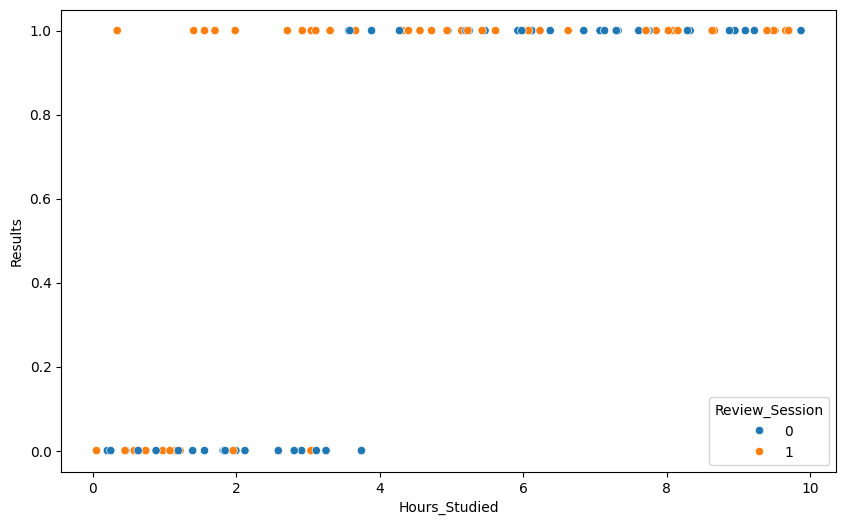

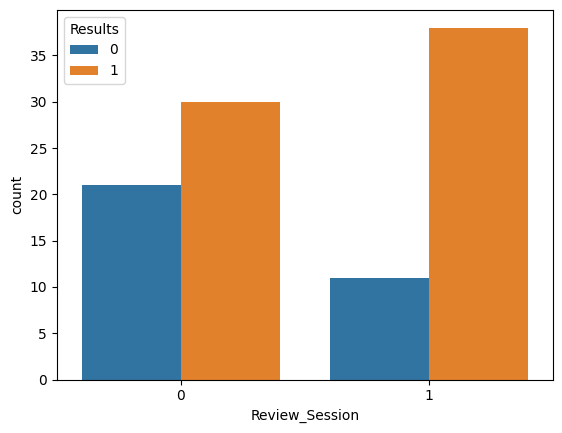

In [11]:
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Hours_Studied", y="Results", hue="Review_Session", data=df)
plt.show()
#Count Plot (for Review_Session)

sns.countplot(x="Review_Session", hue="Results", data=df)
plt.show()




Accuracy: 0.85
ROC AUC: 0.8452380952380952


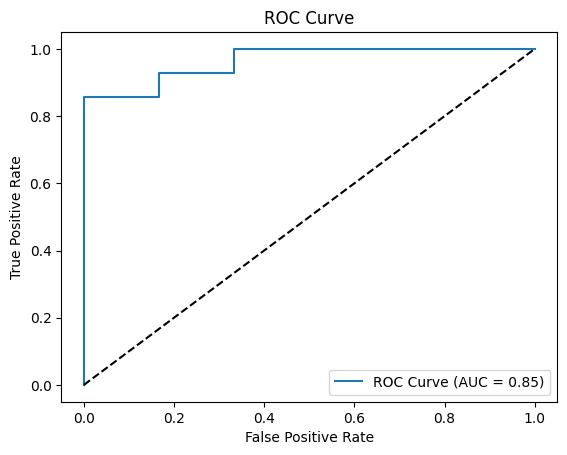

In [15]:
# prompt: fit a model using logistic regression

import matplotlib.pyplot as plt
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



Model Coefficients:
Intercept: [-4.58180384]
Coefficients for features: [[1.40380241 1.42851107]]
Accuracy: 0.85
ROC AUC: 0.8452380952380952


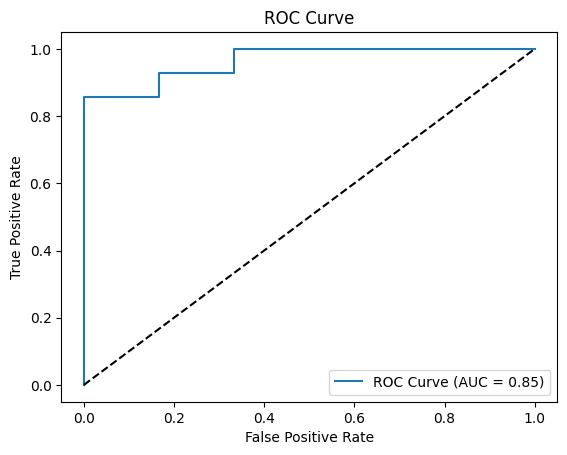

In [16]:
# prompt: output model coefficients and performance metrics such as accuracy and AUC and ROC
# GIVE THE WHOLE CODE

import matplotlib.pyplot as plt
# Print model coefficients
print("Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients for features: {model.coef_}")

# ... (rest of your existing code) ...

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Coefficients:  [[1.40380241 1.42851107]]
Intercept:  [-4.58180384]
